Question 1 c (15 marks) Use approporate functions in pandas and/or matplotlib libraries to analyse the dataset. 
For building machine learning models: - 
What issues do you observe in which of the input features and/or output data? What would happen if the data is not pre-processed properly? 
- How do you pre-process the data to address these issues? Brielfy explain the data and the parameters for the functions you used to reveal and address the issues. - Brielf explain the prepared the data (what are the input and output data and their types) for building the models in Questions 2 - 3. 


In [16]:
import pandas as pd

df = pd.read_excel("data-Salaries.xlsx")
df.head(100)


,age,class,education,edu_no,marital,occupation,relationship,race,gender,hr_wk,salary
0,25,1.0,11,7,Never-married,8.0,Own-child,Black,Male,40,<=50K.
1,38,1.0,2,9,Married-civ-spouse,10.0,Husband,White,Male,50,<=50K.
2,28,5.0,4,12,Married-civ-spouse,13.0,Husband,White,Male,40,>50K.
3,44,1.0,8,10,Married-civ-spouse,8.0,Husband,Black,Male,40,>50K.
4,34,1.0,10,6,Never-married,3.0,Not-in-family,White,Male,30,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...
95,29,1.0,6,11,Married-civ-spouse,5.0,Husband,White,Male,40,>50K.
96,40,1.0,8,10,Married-civ-spouse,7.0,Husband,White,Male,40,<=50K.
97,26,1.0,2,9,Never-married,7.0,Unmarried,White,Male,40,<=50K.
98,46,1.0,2,9,Married-civ-spouse,2.0,Husband,White,Male,40,<=50K.


In [4]:
df.shape



(9391, 11)

In [5]:
df.size

103301

In [6]:
df.columns

Index(['age', 'class', 'education', 'edu_no', 'marital', 'occupation',
       'relationship', 'race', 'gender', 'hr_wk', 'salary'],
      dtype='object')

In [7]:
gender_count = df['gender'].value_counts()
gender_count

Male      6291
Female    3100
Name: gender, dtype: int64

<AxesSubplot:>

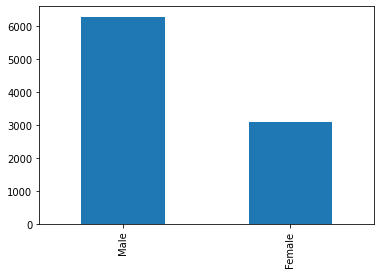

In [8]:
gender_count.plot(kind='bar')

Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           9391 non-null   int64  
 1   class         9386 non-null   float64
 2   education     9391 non-null   int64  
 3   edu_no        9391 non-null   int64  
 4   marital       9391 non-null   object 
 5   occupation    9385 non-null   float64
 6   relationship  9391 non-null   object 
 7   race          9391 non-null   object 
 8   gender        9391 non-null   object 
 9   hr_wk         9391 non-null   int64  
 10  salary        9391 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 807.2+ KB


In [10]:
df.isnull()

,age,class,education,edu_no,marital,occupation,relationship,race,gender,hr_wk,salary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9386,False,False,False,False,False,False,False,False,False,False,False
9387,False,False,False,False,False,False,False,False,False,False,False
9388,False,False,False,False,False,False,False,False,False,False,False
9389,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age             0
class           5
education       0
edu_no          0
marital         0
occupation      6
relationship    0
race            0
gender          0
hr_wk           0
salary          0
dtype: int64

In [12]:
df = df.dropna().reset_index()
df = df.drop(['index'], axis = 1)
df.isnull().sum()

age             0
class           0
education       0
edu_no          0
marital         0
occupation      0
relationship    0
race            0
gender          0
hr_wk           0
salary          0
dtype: int64

In [17]:
df.dtypes

age               int64
class           float64
education         int64
edu_no            int64
marital          object
occupation      float64
relationship     object
race             object
gender           object
hr_wk             int64
salary           object
dtype: object

In [18]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,marital,relationship,race,gender,salary
0,Never-married,Own-child,Black,Male,<=50K.
1,Married-civ-spouse,Husband,White,Male,<=50K.
2,Married-civ-spouse,Husband,White,Male,>50K.
3,Married-civ-spouse,Husband,Black,Male,>50K.
4,Never-married,Not-in-family,White,Male,<=50K.


In [3]:
obj_df["marital"].value_counts()

NameError: name 'obj_df' is not defined

Question 2. Linear Regression [20 marks] 
Question 2a. (5 marks) Build a linear regression model to predict people's salary. Briefly explain the parameters in the functions used. Explain breifly what input features and target output/labels are used in the training. What are the types of the input features? 
Question 2b. (5 marks) Show the code which evaluates the trained linear regression model, and explain the parameters used in the function. What does your evaluation mean in terms of predicting salaries? Is this a good model for future prediction? 
Question 2c. (5 marks) Study the coefficients found in the trained model. Which three features are the most important to predict people's salary? Are these three important features reliable predicting people's salary? Why? 


In [14]:
x = df[['age', 'class', 'education', 'edu_no', 'marital', 'occupation',
       'relationship', 'race', 'gender', 'hr_wk']]
y = df[['salary']]

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt 
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

TypeError: '(slice(None, None, None), None)' is an invalid key

Question 3. Decision Tree [35 marks] 
Question 3a. (2 marks) Build a decision tree to predict people's salaries. Briefly explain the data used in the training. 
Question 3b. (2 marks) Evaluate the decison tree model you built. Show your code to explain if this is a good model of reliable performance predicting salaries. 
Question 3c. (8 marks) Using confusion matrix, analyse the accuracy of the decision tree you trianed. - Is your decision tree model better at classifying people with salaries <=50k, or better at classifying people with > 50k? - Show the function / technique / matric you used, and explain the reasons to support your answers. 


Question 3d. (12 marks) Observe your trained tree. - What are the most important three features to predict people's salary? - Compared with those observed from your linear regression model, which three features are the more reliable predicting people's salary? Breifly expalin your reasons. - List the rule(s) you could extract from the tree which classify people who earn >50k. - Can you predict if someone who has been married for 6 years can earn <=50k or >50k? How reliable is your predcition, i.e. what's the probability that the prediction is wrong? Brelfy explain the reason to support your answer. 
Question 3e. (11 marks) Experiment with different decision trees of different settings and observe their performance. Which decision tree of what settings (e.g. depth, trained by what k value in k-fold validation, etc.) would you use? Briefly explain the reasons for your chosen model w.r.t. the accuracy, overfitting, features, true positive and/or true negative. 


Question 4. Neural Network [10 marks] 
Question 4a (5 marks) - Build, train and tune a neural network to predict salaries. Briefly explain the input and output data. - What's the best accuracy your ANN could achieve on the testing dataset? Is this a good measure, i.e how relaible is the model for future predictions? 
Question 4b. (5 marks) Compare to the decision tree model you built, is your neural network model better at classifying people with <50k, or better at classifying people with > 50k? Explain the reasons to support your answers. 


Question 5. Summary [5 marks] 
With all the above observations from the machine learning models, what would you suggest to do to improve the accuracy in predicting people's salaries? Provide necessary data analysis if you like to support your suggestion. 


Question lb (9 marks) - On average, do female or male work longer hours per week (feature "hr_wk")? - In which marital status (feature "marital"), on average, do male work the longest hours per week ("hr_wk")? - On average, which working class (feature "class") is the oldest population? Are these people working the shortest hours per week? 
In [96] : 
#Answer print("On average, work longer hours per week\n" 
#Supporting code 

Question 2d. (5 marks) Based on the above analysis, breifly explain if linear regression is a good machine learning model for this task. 
